**Copyright: © NexStream Technical Education, LLC**.  
All rights reserved

# LDA
The LDA class includes the following contructor and methods:


*   def __init__(self, num_dim_keep):
*   def compute_scatter(self, X, y):
*   def compute_lin_discriminants(self, X, y):
*   def project_axes(self, X):
UPDATE THIS LIST

<br>

Follow the procedure and complete the code in the cell below.

1.  Compute the scatter matrices  
  $S_w=\sum_{\text{i=1}}^{\text{n}} (N_i-1)S_i = \sum_{\text{i=1}}^{\text{n}}\sum_{\text{j=1}}^{\text{N}_i}(x_{i,j}-\bar x_i)(x_{i,j}-\bar x_i)^T$

  $S_b=\sum_{\text{i=1}}^{\text{c}} N_i(\bar x_i-\bar x)(\bar x_i-\bar x)^T$

2.  Perform eigenanalysis on scatter matrices:  Sw-1 Sb
3.  Sort the eigenvectors by decreasing eigenvalues and choose k eigenvectors with largest eigenvalues to form projection matrix (i.e. the linear discriminants)
4.  Project data into new subspace


**Part 1:**   
From-scratch implementation

In [4]:
from sklearn import datasets
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np


class LDA:

  #### Class constructor
  # def __init__(self, num_dim_keep):
  #   inputs:  num_dim_keep = number of dimensions to keep
  #   instance variables:
  #     S_b:                  Between-class scatter
  #     S_w:                  Within-class scatter
  #     linear_discriminants: linear discriminants
  #     num_features:         Number of features in dataset
  #     num_classes:          Number of classes (categories) in dataset
  #     eigenvalues:          Eigenvalues of (S_w^-1)S_b
  #     eigenvectors:         Eigenvectors of (S_w^-1)S_b
  #     mean_overall:         Overall mean of dataset
  #     mean_diff_shape:      Modified shape of class mean - overall mean
  #def __init__(self, num_dim_keep):
    #YOUR CODE HERE
  def __init__(self, num_dim_keep):
    self.num_dim_keep = num_dim_keep
    self.linear_discriminants = None
    self.num_features = None
    self.num_classes = None
    self.eigenvalues = None
    self.eigenvectors = None
    self.mean_overall = None
    self.S_b = None
    self.S_w = None



  ####  Method compute_scatter(self, X, y):
  #  def compute_scatter(self, X, y):
  #  Compute between-class variance S_b, and within-class variance S_w
  #     S_w = sum over c classes (distance from each sample to class mean)
  #     S_b = sum over c classes (distance from each class mean to overall mean)
  #  inputs:
  #     X == matrix of features and examples
  #       X.shape[0] == number of examples (rows)
  #       X.shape[1] == number of features (cols)
  #  return:  Within-class and Between-class scatter matrices: S_w, S_b
  #def compute_scatter(self, X, y):
    #Update num_features with the number of features in X
    #YOUR CODE HERE
  def compute_scatter(self, X, y):
    self.num_features = X.shape[1]
    self.num_classes = np.unique(y)

    #Initialize S_w and S_b to 0 for loop-based summation, with
    #matrix dimensions = d x d where d = number of features in dataset
    #YOUR CODE HERE
    #Compute S_w
    #loop over the number of classes in dataset
    #   calculate class mean
    #   for each X in class c, calculate:
    #     S_w = distance from each sample in c to class mean
    #     S_w += dot product[(X in c - class mean), transpose(X in c - class mean)]
    #       Note in implementation, we transpose the first term vs.
    #       what is shown in the formula. This is done to generate the correct
    #       shape for S_w.  We want S_w.shape to be dxd where
    #       d = number of features.  Since X = n x d
    #       (number of examples x number of features)
    #       then the shape of (nxd)dot(nxd).T = nxn (i.e.number of examples).
    #       Therefore, we need to reverse the order of transpose so that
    #       shape of ((nxd).T)dot(nxd) = dxd
    #YOUR CODE HERE

    self.S_w = np.zeros((self.num_features, self.num_features))
    self.S_b = np.zeros((self.num_features, self.num_features))
    self.mean_overall = np.mean(X, axis=0)


    #Compute S_b
    #calculate the overall mean of the dataset
    #loop over the number of classes in dataset
    #     calculate class mean
    #     S_b = sum over c classes (distance from each class mean to overall mean)
    #     S_b += number of sampls in class *
    #            dot product[(class mean - overall mean),
    #                         transpose(class mean - overall mean)]
    #       Note in implementation, we need to reshape (class mean - overall mean)
    #       prior to taking dot product, to generate the correct S_b shape.
    #       Since (class mean - overall mean) will have shape 1xd where
    #       d = number of features, we need to reshape to dx1.  Then the shape
    #       of S_b will be (dx1)dot(dx1).T = dxd
    #YOUR CODE HERE
    for c in self.num_classes:
        X_c = X[y==c]
        mean_c = np.mean(X_c, axis=0)
        self.S_w += (X_c - mean_c).T @ (X_c - mean_c)

        mean_diff = (mean_c - self.mean_overall).reshape(-1, 1)
        self.S_b += X_c.shape[0] * (mean_diff @ mean_diff.T)

  ####  Method compute_lin_discriminants(self, X, y)
  #  def compute_lin_discriminants(self, X, y):
  #  inputs:
  #     X == matrix of features and examples
  #       X.shape[0] == number of examples (rows)
  #       X.shape[1] == number of features (cols)
  #     y == class labels
  #  outputs:  set self.linear_discrimants to top self.num_dim_keep eigenvectors
  #
  #  Maximize between-class variance, minimize within class variance
  #     Generate S_w, S_b:  self.compute_scatter()
  #     Perform eigenanalysis on (S_w^-1)(S_b)
  #     Order the eigenvectors, eigenvalues from high to low
  #     Select k linear discriminants to keep: self.num_dim_keep
  #def compute_lin_discriminants(self, X, y):

    #Compute (S_w^-1)(S_b) and perform eigenanalysis
    #YOUR CODE HERE

    #Order the eigenvectors, eigenvalues from high to low
    #   Sort abs of eigenvalues in decreasing order, then store in
    #   eigenvectors and eigenvalues arrays (now in decreasing order).
    #Save self.linear_discriminants as eigenvectors from 0 to num_dim_keep
    #YOUR CODE HERE

  def compute_lin_discriminants(self, X, y):
    self.compute_scatter(X, y)
    mat = np.linalg.inv(self.S_w) @ self.S_b
    self.eigenvalues, self.eigenvectors = np.linalg.eig(mat)
    idx = np.argsort(self.eigenvalues)[::-1]
    self.eigenvectors = self.eigenvectors[:,idx]
    self.eigenvalues = self.eigenvalues[idx]
    self.linear_discriminants = self.eigenvectors[:,:self.num_dim_keep]

  #### Method project_axes(self, X)
  #  def project_axes(self, X):
  #  inputs:
  #     X == matrix of features and examples
  #       X.shape[0] == number of examples (rows)
  #       X.shape[1] == number of features (cols)
  #  return:  X projected onto the linear discriminant axes

  #def project_axes(self, X):
    #project data onto new axes
    #YOUR CODE HERE

  def project_axes(self, X):
    return X @ self.linear_discriminants

Shape of X: (21, 2)
Shape of transformed X: (21, 2)
Projected data [[-2.05270043  5.35728813]
 [-3.42768331  8.51663748]
 [-1.31633952  6.86893399]
 [-1.29679173  8.1054622 ]
 [ 0.11728673  7.41916928]
 [-1.27724394  9.34199041]
 [-1.99405706  9.06687277]
 [ 3.64270898  5.08517286]
 [ 2.96499143  7.28311164]
 [ 5.79314835  5.91052579]
 [ 4.39861768  7.83334693]
 [ 4.41816547  9.06987514]
 [ 5.83224392  8.38358221]
 [ 5.15452638 10.58152099]
 [ 0.85364764  8.93081513]
 [-1.23814836 11.81504684]
 [ 0.19547788 12.36528213]
 [ 1.59000855 10.44246099]
 [ 2.32636946 11.95410684]
 [ 4.43771325 10.30640335]
 [ 3.04318258 12.22922449]]
Trying:
    print(lda.num_features)
Expecting:
    2
ok
Trying:
    print(lda.num_classes)
Expecting:
    [0 1 2]
ok
Trying:
    print(np.around(lda.eigenvalues, 3))
Expecting:
    [3.845 1.258]
ok
Trying:
    print(np.around(lda.eigenvectors, 3))
Expecting:
    [[ 0.717  0.275]
     [-0.697  0.961]]
ok
Trying:
    print(np.around(lda.mean_overall, 3))
Expecting:

TestResults(failed=0, attempted=7)

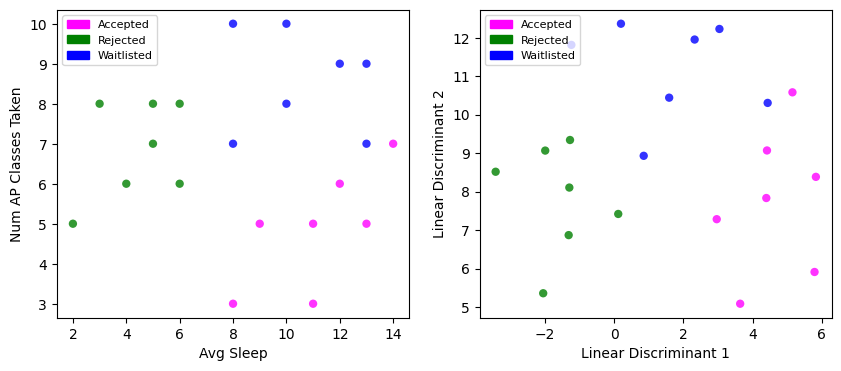

In [5]:
#Test data for Part 1

X = np.array([[2,3,4,5,6,6,5,8,9,11,11,12,13,14,8,8,10,10,12,13,13],
              [5,8,6,7,6,8,8,3,5,3,5,6,5,7,7,10,10,8,9,7,9]]).T
y = np.array([0,0,0,0,0,0,0,1,1,1,1,1,1,1,2,2,2,2,2,2,2]).T


label_colors = ['green', 'magenta', 'blue']
blue_patch = mpatches.Patch(color='blue', label='Waitlisted')
green_patch = mpatches.Patch(color='green', label='Rejected')
mag_patch = mpatches.Patch(color='magenta', label='Accepted')


lda = LDA(2) #project data onto the 2 primary linear discriminants
lda.compute_scatter(X, y)
lda.compute_lin_discriminants(X, y)
X_projected = lda.project_axes(X)
print('Shape of X:', X.shape)
print('Shape of transformed X:', X_projected.shape)
print('Projected data', X_projected)


fig, ax = plt.subplots(1, 2, figsize=(10, 4))
fig.colorbar
ax[0].scatter(X[:,0], X[:,1],
            c=y, edgecolor='none', alpha=0.8,
            cmap=matplotlib.colors.ListedColormap(label_colors))
ax[0].legend(loc=2, prop={'size': 8}, handles=[mag_patch, green_patch, blue_patch])
ax[0].set_xlabel('Avg Sleep')
ax[0].set_ylabel('Num AP Classes Taken')

ax[1].scatter(X_projected[:,0], X_projected[:,1],
            c=y, edgecolor='none', alpha=0.8,
            cmap=matplotlib.colors.ListedColormap(label_colors))
ax[1].legend(loc=2, prop={'size': 8}, handles=[mag_patch, green_patch, blue_patch])
ax[1].set_xlabel('Linear Discriminant 1')
ax[1].set_ylabel('Linear Discriminant 2')



#Run the doctest module.  DO NOT modify any code below this line!
import doctest
"""
  >>> print(lda.num_features)
  2
  >>> print(lda.num_classes)
  [0 1 2]
  >>> print(np.around(lda.eigenvalues, 3))
  [3.845 1.258]
  >>> print(np.around(lda.eigenvectors, 3))
  [[ 0.717  0.275]
   [-0.697  0.961]]
  >>> print(np.around(lda.mean_overall, 3))
  [8.714 6.762]
  >>> print(np.around(lda.S_w, 3))
  [[68.286 15.286]
   [15.286 31.429]]
  >>> print(np.around(lda.S_b, 3))
  [[194.    -11.714]
   [-11.714  48.381]]
"""
doctest.testmod(verbose=True)



**Part 2:**
Test on Iris dataset

Shape of X: (150, 4)
Shape of transformed X: (150, 2)


<ipython-input-6-6d1b4f592399>:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('viridis', 3))


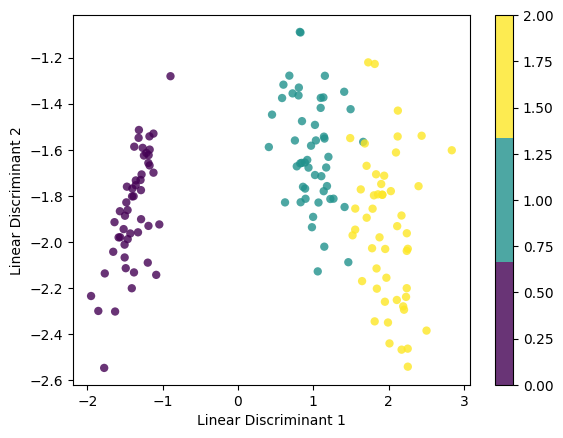

Trying:
    print(lda.num_features)
Expecting:
    4
ok
Trying:
    print(lda.num_classes)
Expecting:
    [0 1 2]
ok
Trying:
    print(np.around(lda.eigenvalues, 3))
Expecting:
    [32.192  0.285 -0.    -0.   ]
ok
Trying:
    print(np.around(lda.eigenvectors, 3))
Expecting:
    [[-0.209 -0.007  0.879  0.152]
     [-0.386 -0.587 -0.328  0.282]
     [ 0.554  0.253 -0.314  0.355]
     [ 0.707 -0.769 -0.144 -0.878]]
ok
Trying:
    print(np.around(lda.mean_overall, 3))
Expecting:
    [5.843 3.057 3.758 1.199]
ok
Trying:
    print(np.around(lda.S_w, 3))
Expecting:
    [[38.956 13.63  24.625  5.645]
     [13.63  16.962  8.121  4.808]
     [24.625  8.121 27.223  6.272]
     [ 5.645  4.808  6.272  6.157]]
ok
Trying:
    print(np.around(lda.S_b, 3))
Expecting:
    [[ 63.212 -19.953 165.248  71.279]
     [-19.953  11.345 -57.24  -22.933]
     [165.248 -57.24  437.103 186.774]
     [ 71.279 -22.933 186.774  80.413]]
ok
5 items had no tests:
    __main__.LDA
    __main__.LDA.__init__
    __main__.L

TestResults(failed=0, attempted=7)

In [6]:
#Test data from iris


data = datasets.load_iris()
X = data.data
y = data.target
lda = LDA(2) #project data onto the 2 primary linear discriminants
lda.compute_scatter(X, y)
lda.compute_lin_discriminants(X, y)
X_projected = lda.project_axes(X)
print('Shape of X:', X.shape)
print('Shape of transformed X:', X_projected.shape)

x1 = X_projected[:, 0]
x2 = X_projected[:, 1]

plt.scatter(x1, x2,
            c=y, edgecolor='none', alpha=0.8,
            cmap=plt.cm.get_cmap('viridis', 3))
plt.colorbar()
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.show()


#Run the doctest module.  DO NOT modify any code below this line!
import doctest
"""
  >>> print(lda.num_features)
  4
  >>> print(lda.num_classes)
  [0 1 2]
  >>> print(np.around(lda.eigenvalues, 3))
  [32.192  0.285 -0.    -0.   ]
  >>> print(np.around(lda.eigenvectors, 3))
  [[-0.209 -0.007  0.879  0.152]
   [-0.386 -0.587 -0.328  0.282]
   [ 0.554  0.253 -0.314  0.355]
   [ 0.707 -0.769 -0.144 -0.878]]
  >>> print(np.around(lda.mean_overall, 3))
  [5.843 3.057 3.758 1.199]
  >>> print(np.around(lda.S_w, 3))
  [[38.956 13.63  24.625  5.645]
   [13.63  16.962  8.121  4.808]
   [24.625  8.121 27.223  6.272]
   [ 5.645  4.808  6.272  6.157]]
  >>> print(np.around(lda.S_b, 3))
  [[ 63.212 -19.953 165.248  71.279]
   [-19.953  11.345 -57.24  -22.933]
   [165.248 -57.24  437.103 186.774]
   [ 71.279 -22.933 186.774  80.413]]
"""
doctest.testmod(verbose=True)
